In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%cd .. 
from utils.utils import get_column_types


from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve



/home/silveira/Documents/portifolio/credit_risk_prediction


In [2]:
df_bureau_features = pd.read_csv('data/tables/bureau_features.csv')
df_bureau_features.head()

,SK_ID_CURR,NUMBER_OF_ACTIVE_CREDITS,NUMBER_OF_CLOSED_CREDITS,DAYS_SINCE_LAST_ACTIVE_CREDIT_APPLICATION,MAX_CREDIT_DAYS_OVERDUE,AVG_CREDIT_DAYS_OVERDUE,TOTAL_CREDIT_DAYS_OVERDUE,NUM_CREDITS_OVERDUE,AVG_DAYS_CREDIT_ENDDATE,DAYS_LAST_ACTIVE_CREDIT,MAX_AMT_CREDIT_MAX_OVERDUE,AVG_CNT_CREDIT_PROLONG,MAX_AMT_CREDIT_SUM,SUM_AMT_CREDIT_SUM_DEBT,AVG_AMT_CREDIT_SUM_LIMIT,SUM_AMT_CREDIT_SUM_OVERDUE,MOST_COMMON_CREDIT_TYPE,AVG_AMT_ANNUITY,MAX_AVG_STATUS
0,100001,3,4,-49.0,0,0.0,0,0,82.428571,-544.0,NaN,0.0,1453365.000,596686.5,0.00000,0.0,Consumer credit,3545.357143,0.007519
1,100002,2,6,-103.0,0,0.0,0,0,-349.000000,-36.0,5043.645,0.0,865055.565,245781.0,7997.14125,0.0,Consumer credit,0.000000,0.255682
2,100003,1,3,-606.0,0,0.0,0,0,-544.500000,-540.0,0.000,0.0,1017400.500,0.0,202500.00000,0.0,Consumer credit,NaN,NaN
3,100004,0,2,NaN,0,0.0,0,0,-488.500000,-382.0,0.000,0.0,189037.800,0.0,0.00000,0.0,Consumer credit,NaN,NaN
4,100005,2,1,-62.0,0,0.0,0,0,439.333333,-123.0,0.000,0.0,657126.000,568408.5,0.00000,0.0,Consumer credit,1420.500000,0.000000


In [3]:
df_application_train = pd.read_csv('data/tables/application_train.csv')
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train = df_application_train.merge(df_bureau_features, 'left', 'SK_ID_CURR')

X = df_train.drop(['TARGET', 'SK_ID_CURR'], axis = 1)
y = df_train['TARGET']

In [5]:
numerical_cols, categorical_cols  = get_column_types(X,2)

Numerical columns: 89 ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEX

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

categorical_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                                   ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_pipe, categorical_cols),
        ('num', SimpleImputer(strategy='mean'), numerical_cols)
    ],
    remainder='passthrough'
)       
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf)])


scores = cross_val_predict(rf_model, X, y, cv=3, method='predict_proba', n_jobs=-1)

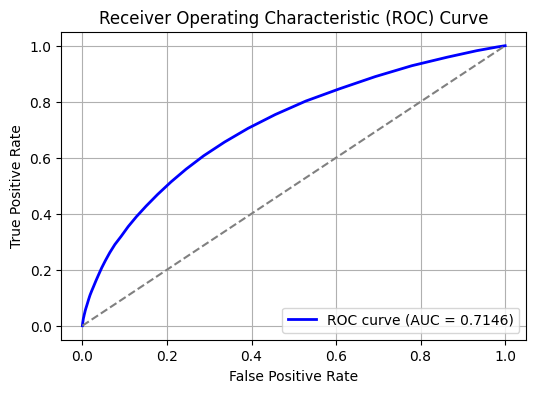

In [7]:
y_probs = scores[:,1]


fpr, tpr, thresholds = roc_curve(y, y_probs)

auc_score = roc_auc_score(y, y_probs)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [10]:
df_application_test = pd.read_csv('data/tables/application_test.csv')
df_test = df_application_test.merge(df_bureau_features, 'left', 'SK_ID_CURR')
X_test = df_test.drop(['SK_ID_CURR'], axis = 1)

In [8]:
rf_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_F...
                                                   'REGION_RATING_CLIENT_W_CITY',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_1',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'APARTMENTS_AVG',
                                                   'BASEMENTAREA_AVG',
                                                   'YEARS_BEGINEXPLUATATION_AVG',
                                                   'YEARS_BUILD_AVG',
                                                   'COMMONAREA_AVG',
                                                   'ELEVATORS_AVG',
                                                   'ENTRANCES_AVG',
                                                   'FLOORSMAX_AVG',
                                                   'FLOORSMIN_AVG',
                                                   'LANDAREA_AVG',
                                                   'LIVINGAPARTMENTS_AVG',
                                                   'LIVINGAREA_AVG', ...])])),
                ('classifier', RandomForestClassifier())])

In [11]:
yhat = rf_model.predict_proba(X_test)

In [16]:
target = pd.Series(yhat[:,1], name='TARGET')
base_line_submission = pd.concat([df_test['SK_ID_CURR'], target], axis = 1)
base_line_submission.to_csv('data/tables/base_line_submission.csv', index=False)
base_line_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.07
1,100005,0.11
2,100013,0.02
3,100028,0.05
4,100038,0.20
